In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('multipleChoiceResponses.csv')

In [7]:
df1 = df[["Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9",
"Q10","Q11_Part_1","Q11_Part_2",
"Q11_Part_3","Q11_Part_4","Q11_Part_5","Q11_Part_6","Q11_Part_7"
          ,'Q23','Q24','Q25','Q26',]]
df1.columns = ['Sex','Age','Country','Highest Education', 'Undergrad Major','Job','Industry','Years of Experience','Salary',
               'Company Use ML','Analyze Data for Product Decisions','Machine Learning Services',
               'Data Infrastructure','ML for New Areas','ML Research','Not Important for Work','Other Task at Work',
              '% Spent Coding','How Long Coding','How Long Using ML','Are you a data scientist']
df1 = df1[1:]

In [8]:
#Age map to lower bound
df1['Age'] = df1.apply(lambda x: int(x['Age'][:2]), axis = 1)

#Takes string of Years of Experience and makes it into an int, taking midpoint of range
def YOE(row):
    exp = str(row['Years of Experience'])
    if exp == 'nan':
        return None
    if '+' in exp: #assume 30+ is 35 for uniformity of data
        return 35
    if len(exp) >= 4:
        return int(exp[-2:])-2.5 
    else: #if len 3
        return int(exp[-1:])-0.5

df1['Years of Experience'] = df1.apply(lambda x: YOE(x), axis = 1)

#Salary Cleaned and Replaced with midpoint value of range
def SalaryClean(row):
    val = str(row['Salary'])
    if val == 'nan' or 'I do not' in val:
        return None
    if '+' in val:
        return 500000
    s = val.split('-')
    low = int(s[0])*1000
    high = int(s[1].replace(",", ""))
    return (low+high)/2 #midpoint for salary

df1['Salary'] = df1.apply(lambda x: SalaryClean(x), axis = 1)

In [24]:
mask = df1['Country'] == 'United States of America'
dfusa = df1[mask]
dictedu = {'Doctoral degree': 'PhD', 'Master’s degree':'MS', 'Bachelor’s degree':'BA',
       'Some college/university study without earning a bachelor’s degree':'Drop',
       'Professional degree':'AA', 'No formal education past high school':'HS',
       'I prefer not to answer':'No'}
dfusa['Highest Education'] = dfusa['Highest Education'].map(dictedu)
dfusa['Highest Education'].unique()

C:\Users\Rudy\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


array(['PhD', 'MS', 'BA', 'Drop', 'AA', 'HS', 'No', nan], dtype=object)

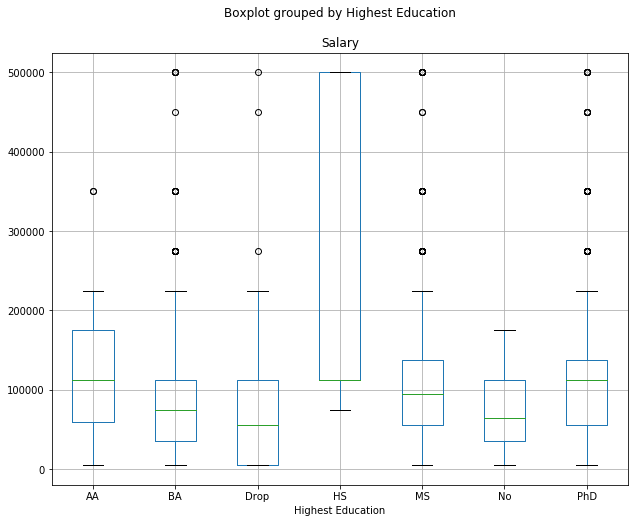

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
dfusa.boxplot(column=['Salary'], by='Highest Education', ax=ax)